In [1]:
import altair as alt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

# Exploratory data analysis of Crime in Vancouver #

The data set used in this project comes from **the Vancouver Open Data Catalogue**. It includes 529.652 crimes reported between January 1, 2003 to July 13, 2017. The data set is also avialable on <https://www.kaggle.com/wosaku/crime-in-vancouver>

In [2]:
df = pd.read_csv('../data/raw/crimedata_csv_all_years.csv')
df = df.query('YEAR <=2020')

### Split data into train set and test set

In [3]:
train_df, test_df = train_test_split(df, test_size=0.20, random_state=123)

## Peek at the data ##

**The following few data illustrates the train data set we will be analyzing. In total there are 9 features (`TYPE`,`YEAR`, `MONTH`, `DAY`, `HOUR`, `MINUTE`, `HUNDRED_BLOCK`, `NEIGHBOURHOOD`, `X`, `Y`) and one target column `TYPE`.**

In [4]:
print(f"The train dataset has {train_df.shape[0]} rows and {train_df.shape[1]} variables ")

The train dataset has 626212 rows and 10 variables 


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626212 entries, 614832 to 800854
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           626212 non-null  object 
 1   YEAR           626212 non-null  int64  
 2   MONTH          626212 non-null  int64  
 3   DAY            626212 non-null  int64  
 4   HOUR           626212 non-null  int64  
 5   MINUTE         626212 non-null  int64  
 6   HUNDRED_BLOCK  626202 non-null  object 
 7   NEIGHBOURHOOD  626111 non-null  object 
 8   X              626156 non-null  float64
 9   Y              626156 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 52.6+ MB


In [6]:
print(f"Vancouver has {train_df['NEIGHBOURHOOD'].nunique()} neighborhoods, and they are")

Vancouver has 24 neighborhoods, and they are


In [7]:
train_df['NEIGHBOURHOOD'].unique()

array(['Central Business District', 'Grandview-Woodland', 'Sunset',
       'Renfrew-Collingwood', 'Kensington-Cedar Cottage', 'Riley Park',
       'Mount Pleasant', 'Kitsilano', 'Strathcona', 'West End',
       'Arbutus Ridge', 'South Cambie', 'Marpole', 'Hastings-Sunrise',
       'Fairview', 'Oakridge', 'West Point Grey', 'Kerrisdale',
       'Shaughnessy', 'Killarney', 'Dunbar-Southlands', 'Stanley Park',
       'Victoria-Fraserview', 'Musqueam', nan], dtype=object)

In [8]:
print(
    f"dataset has information for {train_df['YEAR'].nunique()} years. From {train_df['YEAR'].unique().min()} to {train_df['YEAR'].unique().max()}"
)

dataset has information for 18 years. From 2003 to 2020


In [9]:
numerics = train_df.select_dtypes(include=np.number).columns.tolist()

train_df[numerics].describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y
count,626212.000000,626212.000000,626212.000000,626212.000000,626212.000000,626156.000000,6.261560e+05
mean,2011.051837,6.548982,15.402686,12.411201,15.677975,450359.033471,4.993014e+06
std,5.442121,3.408343,8.761754,7.442430,18.290079,137285.932925,1.521798e+06
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2006.000000,4.000000,8.000000,7.000000,0.000000,490182.680500,5.454248e+06
50%,2011.000000,7.000000,15.000000,14.000000,5.000000,491556.822500,5.457165e+06
75%,2016.000000,9.000000,23.000000,19.000000,30.000000,493390.881350,5.458718e+06
max,2020.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06


**From the data shown above, we will require to perform scaling of the numeric features and One Hot Encoding on categorical features. Also some of the features might consider to be dropped, for example `X` and `Y`, which represents the specific coordinate values of UTM zone 10.**

## Explore trends, relationships and more ##

**As we can observe below, `Theft from Vehicle` is with highest occurrence throughout the years. Are there any particular relationship in specific neighbourhood?**

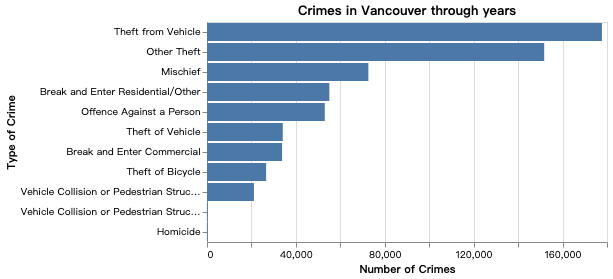

In [10]:
alt.Chart(train_df, title='Crimes in Vancouver through years').mark_bar().encode(
    y=alt.Y('TYPE', sort='-x', title='Type of Crime'),
    x=alt.X('count()', title='Number of Crimes'))

**The following illustrates the types of crimes in relates to different neighbourhood. Again, high occurrence is observed between `Theft from Vehicle` and different neighbourhood.**

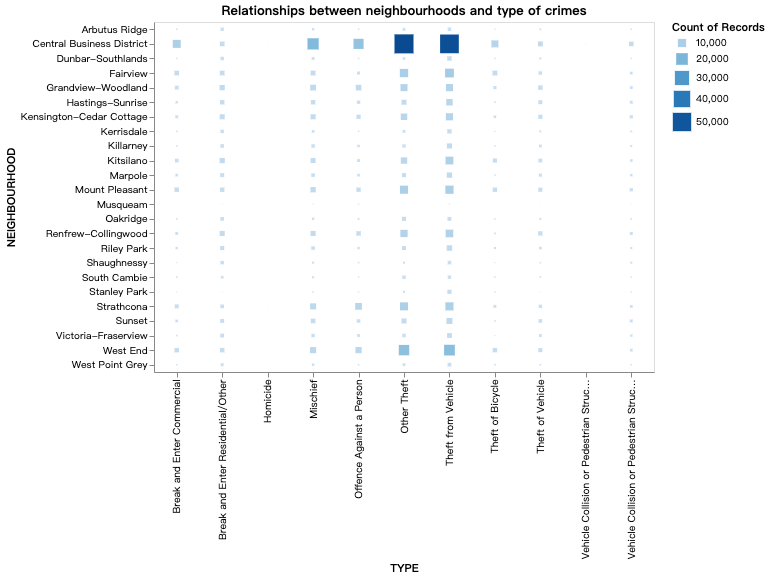

In [11]:
alt.Chart(train_df.dropna(), 
          title = "Relationships between neighbourhoods and type of crimes"
         ).mark_square().encode(
    x='TYPE',
    y='NEIGHBOURHOOD',
    color='count()',
    size='count()').properties(
    width=500,
    height=350
)

**We also conducted a trend analysis on the evolution of crimes over the year. The number of cases related to `Theft of Vehicle` dropped from 2004, but climed up again since 2011. It would be useful to observe how the prediction model captures the time changes.**

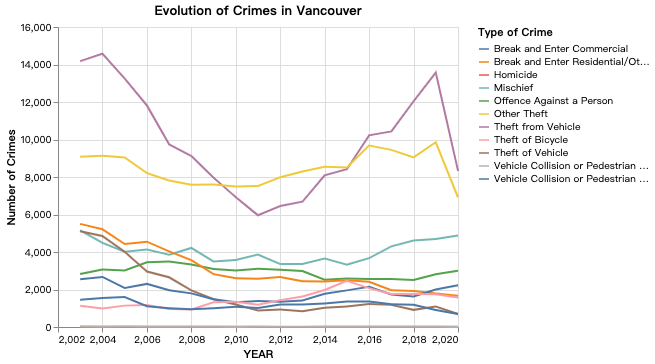

In [12]:
alt.Chart(train_df,title ='Evolution of Crimes in Vancouver').mark_line().encode(
    x=alt.X('YEAR'),
    y=alt.Y('count(YEAR)', title ='Number of Crimes'),
    color=alt.Color('TYPE', title='Type of Crime'))

**The following illustrates the total number of crimes happened per hour. Note that we would need further data wrangling to fine tune data recorded in 00:00.**

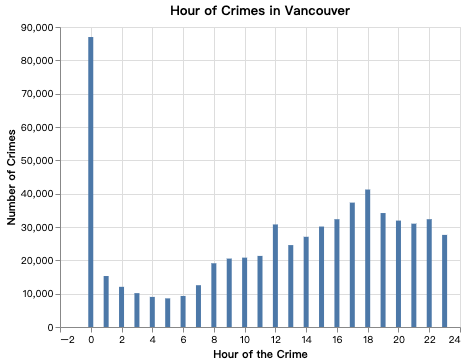

In [13]:
alt.Chart(train_df, title="Hour of Crimes in Vancouver").mark_bar(clip=True).encode(
    x=alt.X(
        "HOUR",
        title="Hour of the Crime",
        scale=alt.Scale(domain=(0, 23)),
        axis=alt.Axis(format="d")
        ,
    ),
    y=alt.Y("count()", title="Number of Crimes"),
)

**The following shows the number of crimes against each month. It seems that there are no clear relationship.**

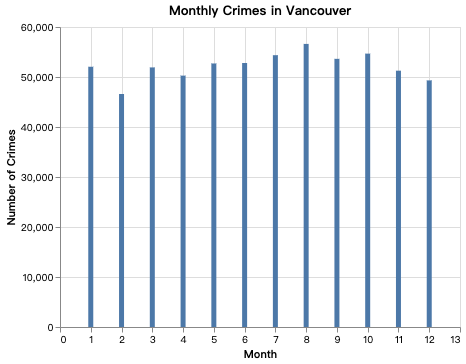

In [14]:
alt.Chart(train_df, title='Monthly Crimes in Vancouver').mark_bar(clip=True).encode(
    x=alt.X('MONTH', title='Month'),
    y=alt.Y('count()', title='Number of Crimes'))

In [15]:
%load_ext rpy2.ipython

In [16]:
%%R
library(tidyverse)
library(knitr)
library(ggridges)
library(ggthemes)
library(ggplot2)
theme_set(theme_gray(base_size = 18))

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Import train data into R for further EDA

In [17]:
%%R -i train_df
train_df |> head()

                                    TYPE YEAR MONTH DAY HOUR MINUTE
614832                Theft from Vehicle 2019     3  10   13      0
249245          Offence Against a Person 2006     2   2    0      0
503265                Theft from Vehicle 2013     1   8   18      0
265222          Offence Against a Person 2009     4  22    0      0
124610                          Mischief 2020     7   5    3     15
59239  Break and Enter Residential/Other 2018     7  14    8     30
                   HUNDRED_BLOCK             NEIGHBOURHOOD        X       Y
614832           5X E CORDOVA ST Central Business District 492492.1 5458844
249245 OFFSET TO PROTECT PRIVACY        Grandview-Woodland      0.0       0
503265           13XX E 43RD AVE                    Sunset 494290.5 5453105
265222 OFFSET TO PROTECT PRIVACY       Renfrew-Collingwood      0.0       0
124610           13XX E 10TH AVE  Kensington-Cedar Cottage 494405.3 5456514
59239           18XX E PENDER ST        Grandview-Woodland 495194.5 

**Below table shows the type of crime with its reported times, as well as percentage**

In [18]:
%%R
type_crime <- train_df |>
  group_by(TYPE) |>
  summarise(Count = n()) |>
  mutate(Percentage = paste0(round(Count / sum(Count) * 100, 2), "%")) |>
  arrange(desc(Count))
type_crime

# A tibble: 11 × 3
   TYPE                                                    Count Percentage
   <chr>                                                   <int> <chr>     
 1 Theft from Vehicle                                     177728 28.38%    
 2 Other Theft                                            151741 24.23%    
 3 Mischief                                                72631 11.6%     
 4 Break and Enter Residential/Other                       55054 8.79%     
 5 Offence Against a Person                                53003 8.46%     
 6 Theft of Vehicle                                        34103 5.45%     
 7 Break and Enter Commercial                              33775 5.39%     
 8 Theft of Bicycle                                        26595 4.25%     
 9 Vehicle Collision or Pedestrian Struck (with Injury)    21124 3.37%     
10 Vehicle Collision or Pedestrian Struck (with Fatality)    240 0.04%     
11 Homicide                                                  218 0.03

**By visualization**

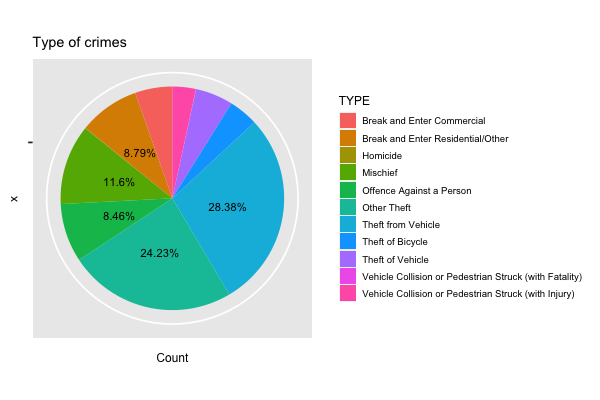

In [19]:
%%R -w 600 -h 400
ggplot(type_crime, aes(x = "", y = Count, fill = TYPE)) +
  geom_col() +
  geom_text(aes(label = ifelse(Count > 50000, Percentage, "")),
            position = position_stack(vjust = 0.5),
            show.legend = FALSE,
            size = 4) +
  coord_polar(theta = "y") +
  scale_y_discrete() +
  theme(text = element_text(size = 12)) +
  ggtitle("Type of crimes")

**Below table and visualization show the number of crimes per neighbourhood**

In [20]:
%%R
# Count Neighbourhood with most crimes
neighbour_crime <- train_df |>
  group_by(NEIGHBOURHOOD) |>
  summarize(Count = n()) |>
  arrange(desc(Count))

neighbour_crime[-c(2),] # Remove crime without Neighbourhood data

# A tibble: 24 × 2
   NEIGHBOURHOOD              Count
   <chr>                      <int>
 1 Central Business District 165611
 2 Strathcona                 39536
 3 Mount Pleasant             39187
 4 Fairview                   39064
 5 Grandview-Woodland         35866
 6 Renfrew-Collingwood        32718
 7 Kitsilano                  31405
 8 Kensington-Cedar Cottage   29988
 9 Hastings-Sunrise           21986
10 Sunset                     20580
# … with 14 more rows


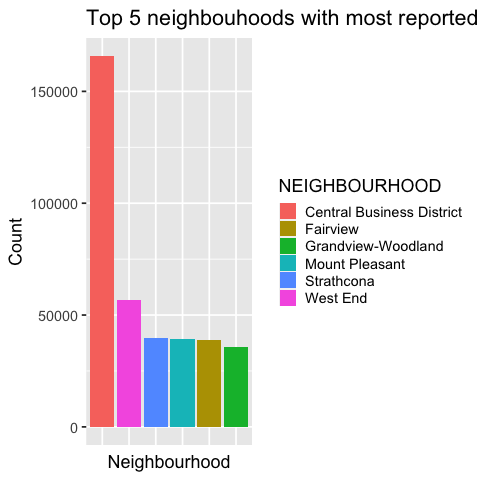

In [21]:
%%R
top_5_district <- head(neighbour_crime)
ggplot(top_5_district) +
  geom_bar(aes(x = reorder(NEIGHBOURHOOD, -Count),
               y = Count, fill = NEIGHBOURHOOD), 
           stat = "identity") +
  theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank()) +
  xlab("Neighbourhood") +
  ggtitle("Top 5 neighbouhoods with most reported crimes")